In [20]:
using Controlz # this *might* take a few min to compile
using PyPlot   # for plotting via matplotlib
using Printf

# (optional) hipster plot theme
PyPlot.matplotlib.style.use("https://raw.githubusercontent.com/SimonEnsemble/Controlz.jl/master/src/hipster.mplstyle")

# second order (SO) transfer functions

a second order transfer function $G(s)$ relating an input $u$ to an output $y$ takes the form:
\begin{equation}
    G(s)= \frac{Y^*(s)}{U^*(s)} = \frac{K}{\tau^2 s^2 + 2\tau \xi s + 1}
\end{equation}

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/so_system.png" width=500>

see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#(0,-2)-order-transfer-functions-1) for handy functions in `Controlz.jl` for dealing with second-order transfer functions.

in this studio, we'll compare two pairs of second-order transfer functions.

**credit** to Dr. Trevor Carlisle for developing this studio.

## juxtaposing $G_1(s)$ and $G_2(s)$

let's compare the following two second-order transfer functions:

\begin{equation}
    G_1(s)=\frac{4}{80 s ^ 2 + 10s + 5}
\end{equation}

\begin{equation}
    G_2(s)=\frac{4}{80 s ^ 2 + 40s + 5}
\end{equation}

🌵 for each transfer function, on pencil and paper, *without using `Controlz.jl`* (but okay to use base Julia for calculations), find the:
* gain $K$
* time constant $\tau$
* damping coefficient $\xi$
* poles $p_+$, $p_-$

In [21]:
k₁ = 4/5 #gain
τ₁ = 80/5 #time constant
ξ₁ = 10/5 #damping coefficient
p_plus_1 = -(ξ₁/τ₁) + (sqrt((ξ₁^2) -1))/τ₁
p_neg_1 = -(ξ₁/τ₁) - (sqrt((ξ₁^2) -1))/τ₁


k₂ = 4/5 #gain
τ₂ = 80/5 #time constant
ξ₂ = 40/5 #damping coefficient
p_plus_2 = -(ξ₂/τ₂) + (sqrt((ξ₂^2) -1))/τ₂
p_neg_2 = -(ξ₂/τ₂) - (sqrt((ξ₂^2) -1))/τ₂

-0.9960783708246108

🌵 use `Controlz.jl` to corroborate (or revise!) your answers above:
* construct the transfer functions and assign them as variables `g₁` and `g₂`
* compute the zeros, poles, and gain with `zeros_poles_gain`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#poles,-zeros,-and-zero-frequency-gain-of-a-transfer-function-1).
* compute the time constant $\tau$ and damping coefficient $\xi$ using `time_constant` and`damping_coefficient`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#(0,-2)-order-transfer-functions-1).
* visualize the poles in the complex plane using `viz_poles_and_zeros`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/viz/#poles-and-zeros-of-a-transfer-function-1). 

In [22]:
# construct the transfer functions

g₁ = k₁ / (τ₁*s^2 + ξ₁*s + 1) #Transfer function 1
g₂ = k₂ / (τ₂*s^2 + ξ₂*s + 1) #Transfer function 2


         0.8
----------------------
16.0*s^2 + 8.0*s + 1.0

In [23]:
# compute the zeros, poles, and gain of the transfer functions

z, p, gain = zeros_poles_gain(g₁)
z, p, gain = zeros_poles_gain(g₂)

(Float64[], [-0.25, -0.25], 0.8)

In [24]:
# compute τ and ξ of the transfer functions

τ₁ = time_constant(g₁)
ξ₁ = damping_coefficient(g₁)

τ₂ = time_constant(g₂)
ξ₂ = damping_coefficient(g₂)


1.0

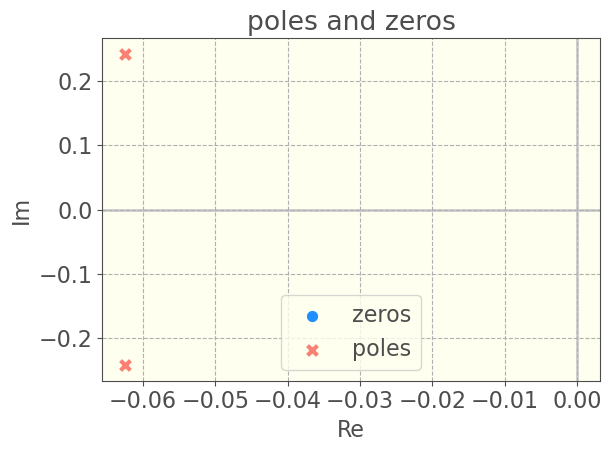

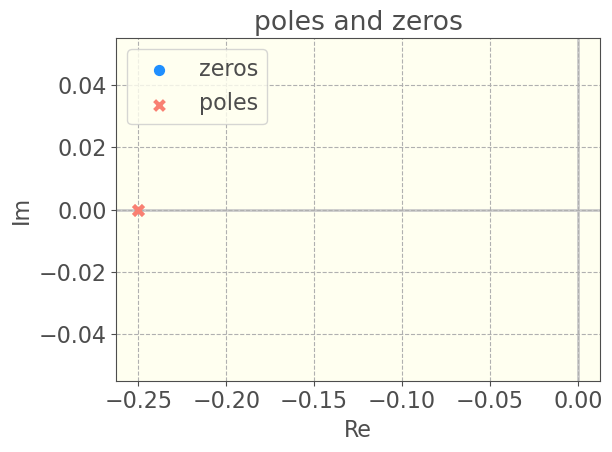

In [25]:
# viz the poles and zeros (well, there shouldn't be any zeros, right?) of the transfer functions

viz_poles_and_zeros(g₁)
viz_poles_and_zeros(g₂)

🌵 is $G_1$ overdamped, critically damped, or underdamped? do you expect the response to a step input to oscillate? why/why not? explain from two perspectives (a) the poles and (b) the value of the damping coefficient, $\xi$.

<mark>G\_1 is underdamped (0 less than \xi_1 less than 1 because the poles are complex conjugates that are non-negative and imaginary. Yes, because the poles are imaginary the response to step input will oscillate that will act in a decaying oscillation behavior due to the value of the damping coefficient</mark>

🌵 is $G_2$ overdamped, critically damped, or underdamped? do you expect the response to a step input to oscillate? why/why not? explain from two perspectives (a) the poles and (b) the value of the damping coefficient, $\xi$.

<mark>G_2 is undamped (\xi_2 = 0) because the poles do not contain a real component and are purely imaginary which results in undamped oscillations</mark>

🌵 for both $G_1(s)$ and $G_2(s)$, use `Controlz.jl` to simulate the response to a unit step input for $t \in [0, 80]$. see [docs](https://simonensemble.github.io/Controlz.jl/dev/sim/#response-of-an-underdamped-second-order-system-to-a-unit-step-input-1). plot *both* reponses on the same plot. to do this, don't use `viz_response`, but rather make your own line plots. the example below might help.

```julia
figure()
plot(t₁, y₁, color="C0", label="first plot") # use first color in color cycle
plot(t₂, y₂, color="C1", label="second plot") # use second color in color cycle
xlabel("my xlabel")
ylabel("my ylabel")
title("go beavs!")
legend()
```

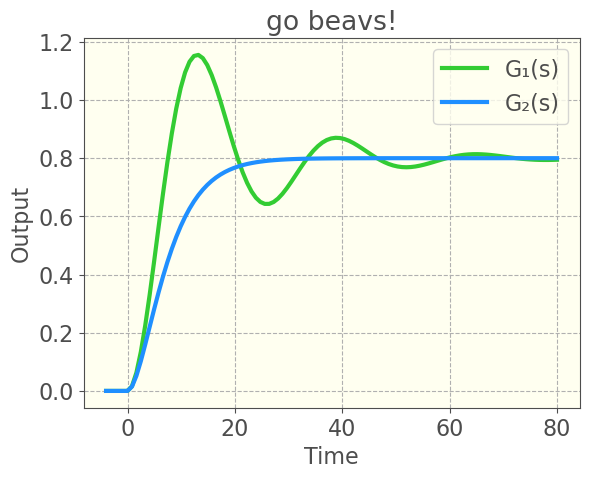

PyObject <matplotlib.legend.Legend object at 0x000000004DEC1880>

In [26]:
#t₁ = collect(range(0.0, 80.0, length=500))
#t₂ = collect(range(0.0, 80.0, length = 500))
U = 1 / s #impulse
M = U

Y₁ = g₁*U
Y₂ = g₂*U

data1 = simulate(Y₁, 80.0)
data1[:, :t]
data1[:, :output]

y₁_at_t = data1[:, :output]
t₁ = data1[:, :t]


data2 = simulate(Y₂, 80.0)
data2[:, :t]
data2[:, :output]

y₂_at_t = data2[:, :output]
t₂ = data2[:, :t]

figure()
plot(t₁, y₁_at_t, color="C0", label="G₁(s)") # use first color in color cycle
plot(t₂, y₂_at_t, color="C1", label="G₂(s)") # use second color in color cycle
xlabel("Time")
ylabel("Output")
title("go beavs!")
legend()

🌵 regarding the presence/absence of oscillations in the response, does the simulation conform to your expectations you wrote above?

<mark>Yep! G\_1 is underdamped shown by the decaying oscillations, G\_2 is undamped where the damping coefficient is 0 and there are undamped oscillations shown in blue </mark>

🌵 which process, $G_1(s)$ or $G_2(s)$, has a faster response? here, the "faster" response is defined as the one whose output first reaches, say, 95% of the new steady state, as opposed to settling at the new steady state. based on the $\tau$ and $\xi$ of these two transfer functions, does this outcome make sense?

<mark>I believe that G\_1 has the faster response when compared to G\_2. Both transfer functions have a time constant of 80/5 in standard gain form, however the damping coefficient of G\_2 is 0, indicating it is in the undamped regime, G\_1 has a damping coefficient of 40/5 and one can see that for a higher damping coefficient there are greater disturbances or oscillations. </mark>

## juxtaposing $G_3(s)$ and $G_4(s)$

let's compare the following two second-order transfer functions:

\begin{equation}
    G_3(s)=\frac{5}{64 s ^ 2 + 64s + 4}
\end{equation}

\begin{equation}
    G_4(s)=\frac{5}{4 s ^ 2 + 24s + 4}
\end{equation}

🌵 for each transfer function, use `Controlz.jl` to:
* construct the transfer functions and assign them as variables `g₃` and `g₄`
* compute the zeros, poles, and gain with `zeros_poles_gain`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#poles,-zeros,-and-zero-frequency-gain-of-a-transfer-function-1).
* compute the time constant $\tau$ and damping coefficient $\xi$ using `time_constant` and`damping_coefficient`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#(0,-2)-order-transfer-functions-1).
* visualize the poles in the complex plane using `viz_poles_and_zeros`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/viz/#poles-and-zeros-of-a-transfer-function-1). 

In [27]:
# construct the transfer functions

k₃ = 5/4 #gain
τ₃ = 64/4 #time constant
ξ₃ = 64/4 #damping coefficient
p_plus_1 = -(ξ₃/τ₃) + (sqrt((ξ₃^2) -1))/τ₃
p_neg_1 = -(ξ₃/τ₃) - (sqrt((ξ₃^2) -1))/τ₃


k₄ = 5/4 #gain
τ₄ = 4/4 #time constant
ξ₄ = 24/4 #damping coefficient
p_plus_2 = -(ξ₄/τ₄) + (sqrt((ξ₄^2) -1))/τ₄
p_neg_2 = -(ξ₄/τ₄) - (sqrt((ξ₄^2) -1))/τ₄

g₃ = k₃ / (τ₃*s^2 + ξ₃*s + 1) #Transfer function 3
g₄ = k₄ / (τ₄*s^2 + ξ₄*s + 1) #Transfer function 4



        1.25
---------------------
1.0*s^2 + 6.0*s + 1.0

In [28]:
# compute the zeros, poles, and gain of the transfer functions

z, p, gain = zeros_poles_gain(g₃)
z, p, gain = zeros_poles_gain(g₄)

(Float64[], [-5.82842712474619, -0.1715728752538099], 1.25)

In [29]:
# compute τ and ξ of each transfer function

τ₃ = time_constant(g₃)
ξ₃ = damping_coefficient(g₃)

τ₄ = time_constant(g₄)
ξ₄ = damping_coefficient(g₄)


3.0

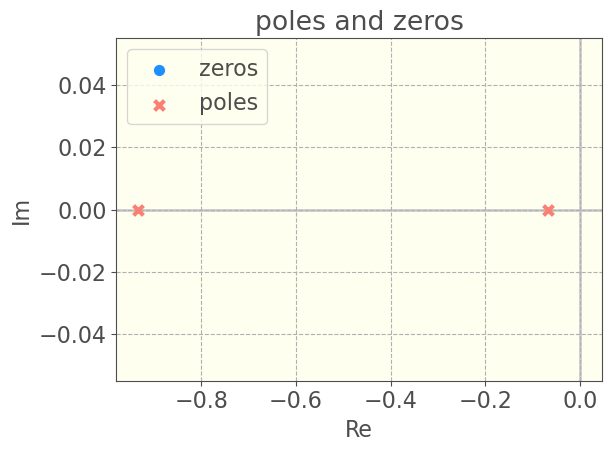

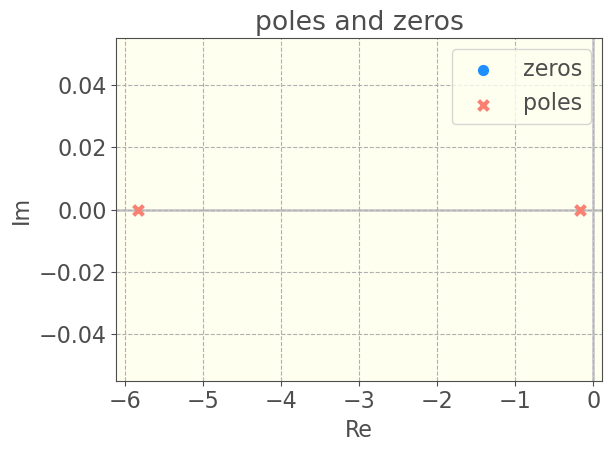

In [30]:
# viz the poles and zeros (well, there shouldn't be any zeros, right?) of the transfer functions

viz_poles_and_zeros(g₃)
viz_poles_and_zeros(g₄)

🌵 are the transfer functions overdamped, critically damped, or underdamped? do you expect the response to a step input to oscillate? why/why not? explain from two perspectives (a) the poles and (b) the value of the damping coefficient, $\xi$.

<mark>For G\_3, the transfer function is undamped or critically damped as the poles are real and negative, the damping coefficient likely contributes to an oscillating response, in G\_4 as the poles are real and negative and the time constant is 1 so I expect this response to be critically damped. I expect the oscillations to be smaller in G\_4 since the damping coefficient is less.</mark>

🌵 can you predict which transfer function has a faster response? <mark>G\_2 </mark>

🌵🌵based on a comparison of $\tau$'s, what might you expect? <mark>Neither </mark>

🌵🌵based on a comparison of $\xi$'s, what might you expect? <mark>G\_2 </mark>

[you should be hesitant to boldly draw a conclusion to the first question...]

🌵 for both $G_3(s)$ and $G_4(s)$, use `Controlz.jl` to simulate the response to a unit step input for $t \in [0, 80]$. see [docs](https://simonensemble.github.io/Controlz.jl/dev/sim/#response-of-an-underdamped-second-order-system-to-a-unit-step-input-1). plot *both* reponses on the same plot.

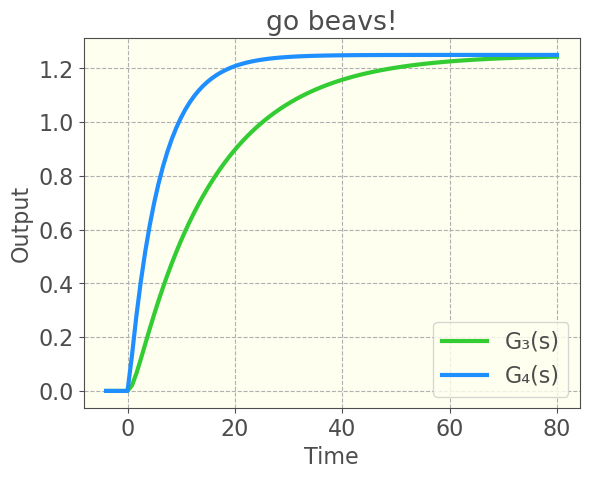

PyObject <matplotlib.legend.Legend object at 0x0000000064FC66D0>

In [31]:
U2 = 1 / s #unit step

Y₃ = g₃*U2
Y₄ = g₄*U2

data3 = simulate(Y₃, 80.0)
data3[:, :t]
data3[:, :output]

y₃_at_t = data3[:, :output]
t₃ = data3[:, :t]


data4 = simulate(Y₄, 80.0)
data4[:, :t]
data4[:, :output]

y₄_at_t = data4[:, :output]
t₄ = data4[:, :t]

figure()
plot(t₃, y₃_at_t, color="C0", label="G₃(s)") # use first color in color cycle
plot(t₄, y₄_at_t, color="C1", label="G₄(s)") # use second color in color cycle
xlabel("Time")
ylabel("Output")
title("go beavs!")
legend()

🌵 are there oscillations in the responses? justify based on the pole plot.

<mark>Nope! This makes sense as the poles are equal to zero </mark>

🌵 which process has the faster response? can you justify this by looking at the poles?

<mark>The process with a faster response is G\_2, this makes sense because it has a higher damping coefficient when compared to G\_1 and the curve reaches steady state first </mark>

## visualizing how $\xi$ affects the step response of a second order system

🌵 write a `for` loop to simulate the unit step response to 

\begin{equation}
    G(s)=\frac{4}{80 s ^ 2 + 40\xi s + 5}
\end{equation}

for the damping coefficient $\xi = [0.2, 0.4, 0.6, 0.8, 1.0]$ and plot the responses on the same plot. do not copy and paste code; use a for loop over $\xi$'s for constructing the transfer function, simulating the response for $t\in[0,80]$, and plotting the curves. use a legend to label which $\xi$ each output response curve corresponds to. note you can format `Float64` variables as `String`s via e.g. below.

In [32]:
x = 1.2
"hello, x=$x. the dollar sign put the variable into here. change x to see."

"hello, x=1.2. the dollar sign put the variable into here. change x to see."

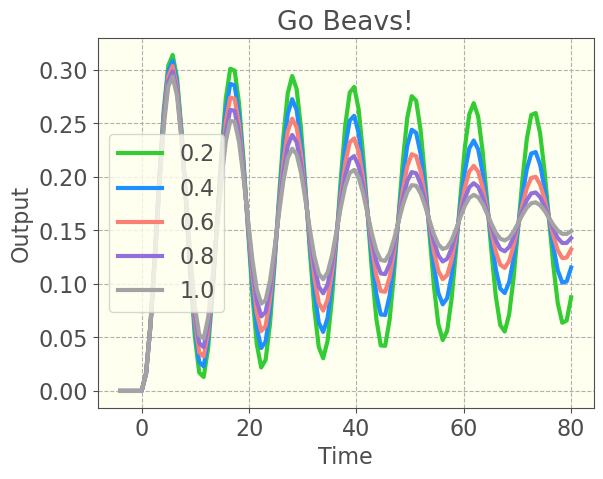

PyObject <matplotlib.legend.Legend object at 0x000000004D94FD30>

In [33]:
τ = 80/5 #time constant
k = 4/5 #gain

U2 = 1 / s #unit step
array_ξ = [0.2, 0.4, 0.6, 0.8, 1.0]
figure()
for i = array_ξ # for each value in 
    # define g
    g_loop = k / (τ*s^2 + i *s + 5)
    # define Y
    Y = g_loop * U
    
    # get the data
    data = simulate(Y, 80.0)
    data[:, :t]
    data[:, :output]
    
    # define the values you want to plot
    y_at_t = data[:, :output]
    t = data[:, :t]
    
    # then plot it
    plot(t, y_at_t, label=string(i))
end
xlabel("Time")
ylabel("Output")
title("Go Beavs!")
legend()